In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from env import user, host, password
from wrangle import get_connection, new_zillow_data, get_zillow_data

# Acquire

In [2]:
df = get_zillow_data()
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [3]:
# Lets get shorter and easier to understand names
df = df.rename(columns= {'bedroomcnt' : 'bedrooms', 
                         'bathroomcnt' : 'bathrooms', 
                         'calculatedfinishedsquarefeet' : 'area_sqft', 
                         'taxvaluedollarcnt' : 'tax_value', 
                         'yearbuilt' : 'year_built', 
                         'taxamount' : 'tax_amount'})

In [4]:
# Checking the renamed columns
df.head()

,bedrooms,bathrooms,area_sqft,tax_value,year_built,tax_amount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [5]:
df.shape

(2152863, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   bedrooms    float64
 1   bathrooms   float64
 2   area_sqft   float64
 3   tax_value   float64
 4   year_built  float64
 5   tax_amount  float64
 6   fips        float64
dtypes: float64(7)
memory usage: 131.4 MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,2152852.0,3.287196,0.954754,0.00,3.00,3.00,4.00,25.00
bathrooms,2152852.0,2.230688,0.999280,0.00,2.00,2.00,3.00,32.00
area_sqft,2144379.0,1862.855178,1222.125124,1.00,1257.00,1623.00,2208.00,952576.00
tax_value,2152370.0,461896.237963,699676.049600,1.00,188170.25,327671.00,534527.00,98428909.00
year_built,2143526.0,1960.949681,22.162196,1801.00,1949.00,1958.00,1976.00,2016.00
tax_amount,2148421.0,5634.865978,8178.910249,1.85,2534.98,4108.95,6414.32,1337755.86
fips,2152863.0,6048.377335,20.433292,6037.00,6037.00,6037.00,6059.00,6111.00


In [8]:
df.isna().sum()

# Get a boolean telling you if there are nulls in a column
# df.isnull().any()

# Get list of column names that have nulls
# df.columns[df.isnull().any()]

bedrooms        11
bathrooms       11
area_sqft     8484
tax_value      493
year_built    9337
tax_amount    4442
fips             0
dtype: int64

array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'area_sqft'}>],
       [<AxesSubplot:title={'center':'tax_value'}>,
        <AxesSubplot:title={'center':'year_built'}>,
        <AxesSubplot:title={'center':'tax_amount'}>],
       [<AxesSubplot:title={'center':'fips'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

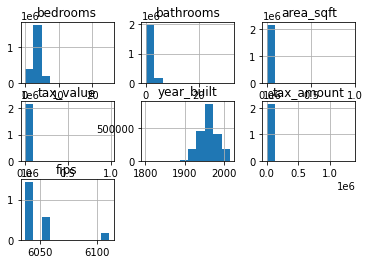

In [9]:
df.hist()

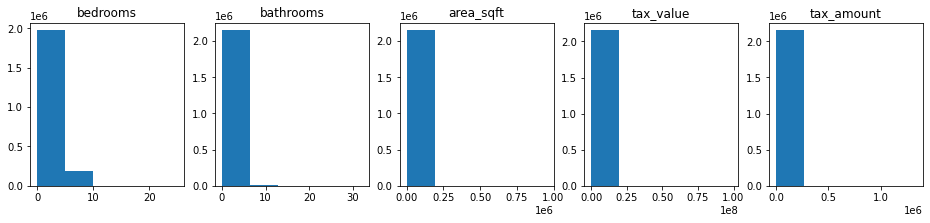

In [10]:
# Make a nicer histogram than the previous histplot
plt.figure(figsize=(16, 3))

# List of columns
#cols = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 
#       'taxvaluedollarcnt', 'yearbuilt', 'taxamount', 'fips']
cols = [col for col in df.columns if col not in ['fips', 'year_built']]

for i, col in enumerate(cols):
    
    # Plot number should start at 1, but i starts at 0
    plot_number = i + 1
    
    # Create subplots
    plt.subplot(1, len(cols), plot_number)
    
    # Add a title to the subplots
    plt.title(col)
    
    # Make a histogram for each column
    df[col].hist(bins=5)
    # df.col.hist(bins=5)   for some reason this alternative line gets an error
    
    # Hide the grids in the subplots
    plt.grid(False)
    
plt.show()

<AxesSubplot:>

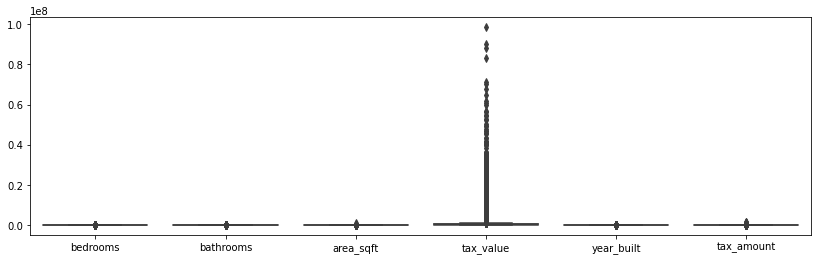

In [11]:
plt.figure(figsize=(14,4))
sns.boxplot(data=df.drop(columns='fips'))

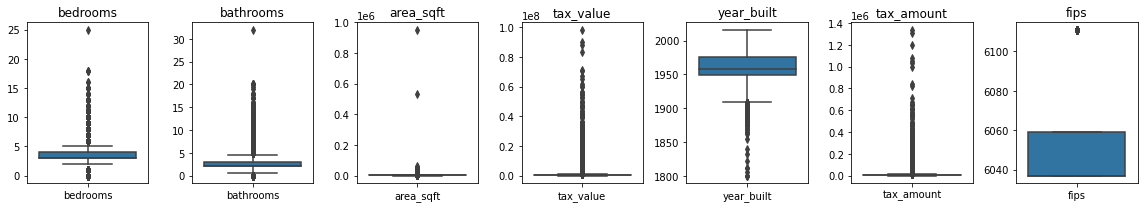

In [12]:
# Make a nicer boxplot than the previous boxplot
plt.figure(figsize=(16, 3))

# List of columns
#cols = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 
#       'taxvaluedollarcnt', 'yearbuilt', 'taxamount', 'fips']

#cols = [col for col in df.columns if col not in ['fips', 'year_built']]
cols = df.columns

for i, col in enumerate(cols):
    
    # Plot number should start at 1, but i starts at 0
    plot_number = i + 1
    
    # Create subplots
    plt.subplot(1, len(cols), plot_number)
    
    # Add a title to the subplots
    plt.title(col)
    
    # Make a histogram for each column
    sns.boxplot(data = df[[col]])
    
    # Hide the grids in the subplots
    plt.grid(False)
    
#plt.show()
plt.tight_layout()
# Some of my plots are shaped differently than John's, 
# perhaps because of my method of acquiring?

### Takeaways for Acquire <br>
- All columns are float64 <br>
- Only taxamount and bathroomcnt need to be float, the rest can be int <br>
- Lots of null values in most columns <br>
- Some columns have a huge range of values <br>
- Some columns have extreme outliers <br>
- Some columns do not have a normal distribution

# Prepare

In [13]:
# Check for nulls again
df.isnull().sum()
# I will impute the null values later

bedrooms        11
bathrooms       11
area_sqft     8484
tax_value      493
year_built    9337
tax_amount    4442
fips             0
dtype: int64

In [30]:
# Nulls are rare for bedrooms and bathrooms
# Nulls may not appear in train after splitting
# Thus, I am dropping nulls for bedroom and bathroom now
df.bedrooms.dropna()
df.bathrooms.dropna()
df.isnull().sum()

bedrooms         0
bathrooms        0
area_sqft      175
tax_value      102
year_built    1127
fips             0
dtype: int64

In [15]:
# Replace a whitespace sequence or empty with a NaN value 
# and reassign this manipulation to df.
df = df.replace(r'^\s*$', np.nan, regex=True)

In [16]:
def remove_outliers(df, k, col_list):
    '''
    Remove outliers from a list of columns.
    '''
    for col in col_list:
        # Get quartiles
        q1, q3 = df[col].quantile([.25, .75])
        
        # Get interquartile range
        iqr = q3 - q1
        
        upper_bound = q3 + k * iqr
        lower_bound = q1 - k * iqr
        
        # Return the dataframe without the outliers
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
        return df

In [17]:
df = remove_outliers(df, 1.5, df.columns)
df

,bedrooms,bathrooms,area_sqft,tax_value,year_built,tax_amount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0
...,...,...,...,...,...,...,...
2152856,4.0,4.0,4375.0,422400.0,2015.0,13877.56,6037.0
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


In [18]:
# Get the value_counts
cols = df.columns
for col in cols:
    print(col.upper())
    #print(df.col.value_counts())   For some reason this also gives an error
    print(df[col].value_counts())
    print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')
    print()

BEDROOMS
3.0    964298
4.0    634289
2.0    335473
5.0    150866
Name: bedrooms, dtype: int64
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

BATHROOMS
2.00     939718
3.00     415076
1.00     392834
2.50     142409
4.00      75115
1.50      31019
3.50      27787
5.00      24243
4.50      18544
6.00       7992
5.50       5497
7.00       2257
0.00        772
6.50        699
8.00        556
7.50        152
9.00        139
10.00        47
8.50         28
11.00        12
0.50          7
13.00         6
1.75          3
12.00         3
9.50          2
14.00         2
16.00         2
20.00         2
18.00         2
15.00         1
Name: bathrooms, dtype: int64
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

AREA_SQFT
1200.0     5142
1080.0     4349
1120.0     4322
1400.0     3825
1440.0     3668
           ... 
7818.0        1
9923.0        1
9721.0        1
12234.0       1
8655.0        1
Name: area_sqft, Length: 8710, dtype: int64
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

TAX_VALUE
450000.0   

In [19]:
# fips appears to be a categorical number (i.e. like a zip code)
# year_built may also be categorical if we aren't looking at age
df.fips = df.fips.astype(object)
df.year_built = df.year_built.astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2084926 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   bedrooms    float64
 1   bathrooms   float64
 2   area_sqft   float64
 3   tax_value   float64
 4   year_built  object 
 5   tax_amount  float64
 6   fips        object 
dtypes: float64(5), object(2)
memory usage: 127.3+ MB


# Do my columns leak data from the target column? <br>
- Taxamount can't be calculated unless we have knowledge of tax value <br>
- Taxamount is a function of tax value <br>
- I am dropping tax_amount from the dataframe

In [20]:
df = df.drop(columns='tax_amount')
df.head()

,bedrooms,bathrooms,area_sqft,tax_value,year_built,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,6037.0
18,3.0,1.0,1244.0,169471.0,1950.0,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,6037.0


# Split the data

In [22]:
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(df, test_size=.3, random_state=123)
train.shape, validate.shape, test.shape

((1459448, 6), (625478, 6), (416986, 6))

# Impute year_built with mode

In [34]:
# Need to fill nulls for: year_built, area_sqft, tax_value

# Create -> Fit -> Use
# Create the object
imputer_year = SimpleImputer(strategy='most_frequent')

# Fit the object to train
imputer_year.fit(train[['year_built']])

# Use the object to impute on train, validate, and test subsets
train[['year_built']]=imputer_year.transform(train[['year_built']])
validate[['year_built']]=imputer_year.transform(validate[['year_built']])
test[['year_built']]=imputer_year.transform(test[['year_built']])

# Now repeat the imputing process for area_sqft
imputer_area = SimpleImputer(strategy='median')
imputer_area.fit(train[['area_sqft']])

train[['area_sqft']]=imputer_area.transform(train[['area_sqft']])
validate[['area_sqft']]=imputer_area.transform(validate[['area_sqft']])
test[['area_sqft']]=imputer_area.transform(test[['area_sqft']])

# Now repeat the imputing process for tax_value
imputer_tax = SimpleImputer(strategy='median')
imputer_tax.fit(train[['tax_value']])

train[['tax_value']]=imputer_tax.transform(train[['tax_value']])
validate[['tax_value']]=imputer_tax.transform(validate[['tax_value']])
test[['tax_value']]=imputer_tax.transform(test[['tax_value']])

In [35]:
# Verify that all null values have been filled
train.isnull().sum()

bedrooms      0
bathrooms     0
area_sqft     0
tax_value     0
year_built    0
fips          0
dtype: int64

In [36]:
train.head()

,bedrooms,bathrooms,area_sqft,tax_value,year_built,fips
1979346,4.0,2.5,2068.0,492072.0,1989.0,6059.0
1948908,4.0,2.5,1950.0,142946.0,1977.0,6111.0
1606731,4.0,2.0,1713.0,290100.0,1994.0,6037.0
1408008,3.0,1.5,1458.0,456000.0,1955.0,6059.0
292925,2.0,2.0,971.0,202309.0,1984.0,6037.0
